In [2]:
import tensorflow.keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D,MaxPool2D
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


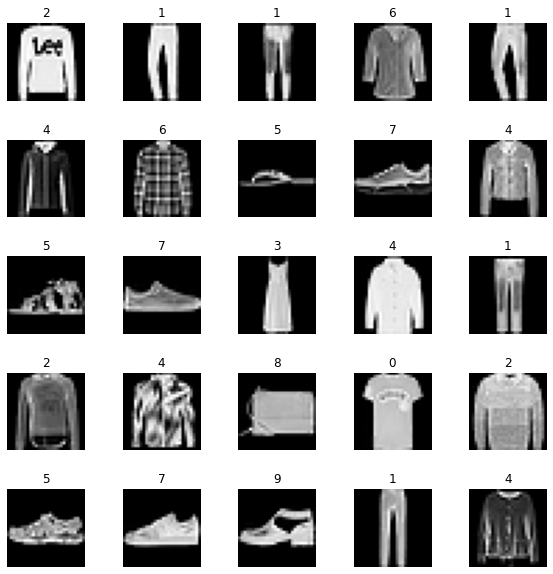

In [8]:
fig=plt.figure(figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)

columns = 5
rows = 5
for i in range(1, columns*rows +1):
    img = x_test[i]
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.title(f'{y_test[i]}')
    plt.imshow(img, cmap='gray')
plt.show()

In [25]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
    
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print("Training samples: {}".format(x_train.shape[0]))
print("Test samples: {}".format(x_test.shape[0]))

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
Training samples: 60000
Test samples: 10000


In [26]:
# convert class vectors to binary class matrices
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)

y_train shape: (60000, 10)


In [27]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [28]:
import time

start_time = time.time()

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(x_train, y_train))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Train on 60000 samples, validate on 60000 samples
Epoch 1/12
60000/60000 - 10s - loss: 0.5268 - accuracy: 0.8142 - val_loss: 0.3052 - val_accuracy: 0.8906
Epoch 2/12
60000/60000 - 9s - loss: 0.3427 - accuracy: 0.8777 - val_loss: 0.2471 - val_accuracy: 0.9093
Epoch 3/12
60000/60000 - 9s - loss: 0.2916 - accuracy: 0.8957 - val_loss: 0.2202 - val_accuracy: 0.9187
Epoch 4/12
60000/60000 - 9s - loss: 0.2622 - accuracy: 0.9038 - val_loss: 0.1864 - val_accuracy: 0.9299
Epoch 5/12
60000/60000 - 9s - loss: 0.2402 - accuracy: 0.9129 - val_loss: 0.1679 - val_accuracy: 0.9378
Epoch 6/12
60000/60000 - 9s - loss: 0.2228 - accuracy: 0.9186 - val_loss: 0.1497 - val_accuracy: 0.9469
Epoch 7/12
60000/60000 - 9s - loss: 0.2038 - accuracy: 0.9250 - val_loss: 0.1375 - val_accuracy: 0.9492
Epoch 8/12
60000/60000 - 9s - loss: 0.1905 - accuracy: 0.9299 - val_loss: 0.1267 - val_accuracy: 0.9541
Epoch 9/12
60000/60000 - 10s - loss: 0.1793 - accuracy: 0.9330 - val_loss: 0.1123 - val_accuracy: 0.9593
Epoch 10/12


NameError: name 'hms_string' is not defined